In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl

mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

from scipy.optimize import fsolve

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [2]:
pp_extras_species = ['h1', 'h2', 'he3', 'he4', 'li7', 'be7', 'b8', 'c12', 'n14', 'o16', 'ne20', 'mg24']

# mass fractions for h1, h2, he3, he4, li7, c12, n14, o16, ne20 come from Lodders 2021
# mass fractions for be7, b8 come from MESA gs98 chem lib (Grevesse & Sauval 1998) (but note, these are so so trace)
# mass fraction for mg24 is 1 - sum of all the others
pp_extras_protosolar_mass_fractions = np.array((7.057e-1, 2.781e-5, 3.461e-5, 2.769e-1, 1.025e-8, 3.592e-89, 1.e-99, 3.011e-3, 8.482e-4, 7.377e-3, 2.261e-3, 5.398e-4))
pp_extras_protosolar_mass_fractions[-1] = 1.0 - np.sum(pp_extras_protosolar_mass_fractions[:-1])

pp_extras_XY = pp_extras_protosolar_mass_fractions[0]/pp_extras_protosolar_mass_fractions[3]
print(pp_extras_XY)
pp_extras_X = np.sum(pp_extras_protosolar_mass_fractions[0:2])
print(pp_extras_X)
pp_extras_Y = np.sum(pp_extras_protosolar_mass_fractions[2:4])
print(pp_extras_Y)
pp_extras_Z = np.sum(pp_extras_protosolar_mass_fractions[4:])
print(pp_extras_Z)

2.548573492235464
0.70572781
0.27693460999999997
0.01733758000000024


In [3]:
tp = Table.read("../1_created_models/planet_create_20.0_Mj_2.0_Rj.profile", format="ascii", header_start=4, data_start=5)
print(tp)
print(tp.colnames)

zone          mass          ... brunt_N2_sub_omega2 sl2_sub_omega2
---- ---------------------- ... ------------------- --------------
   1   0.019092856664474744 ...                 0.0            0.0
   2    0.01909285666445565 ...                 0.0            0.0
   3   0.019092856664431786 ...                 0.0            0.0
   4    0.01909285666440792 ...                 0.0            0.0
   5   0.019092856664360187 ...                 0.0            0.0
   6    0.01909285666426472 ...                 0.0            0.0
   7   0.019092856664045435 ...                 0.0            0.0
   8    0.01909285666382615 ...                 0.0            0.0
   9   0.019092856663306148 ...                 0.0            0.0
  10   0.019092856662786144 ...                 0.0            0.0
 ...                    ... ...                 ...            ...
 580  2.028237668367857e-06 ...                 0.0            1.0
 581  9.232963526466281e-07 ...                 0.0           

In [4]:
print(tp['dm'])

          dm          
----------------------
 3.796442465146463e+19
 4.745553081433081e+19
  4.74555308143308e+19
 9.491106162866158e+19
 1.898221232573232e+20
4.3603288441853444e+20
4.3603288441853444e+20
1.0339776627537096e+21
1.0339776627537096e+21
2.1765521682640764e+21
                   ...
 2.197076218722182e+27
1.0001495460526532e+27
 4.552906226673105e+26
2.0725966925235427e+26
 9.435008053091568e+25
 4.295073156104949e+25
1.9552366903215403e+25
 8.900786763646627e+24
3.7018892511375556e+24
 3.735888189243418e+24
Length = 589 rows


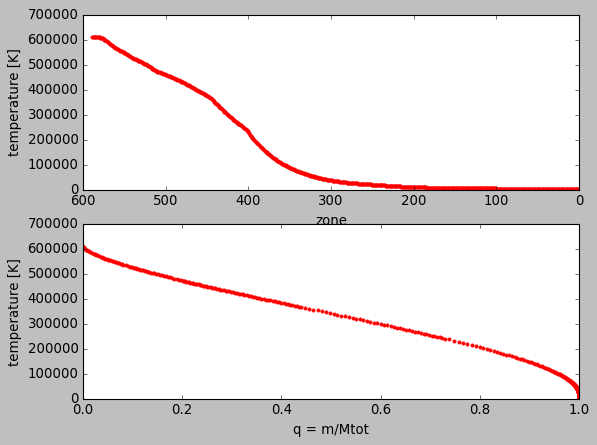

In [5]:
fig, axes = plt.subplots(2,1,figsize=(8,6))
#axes[0].plot(tp['zone'],tp['z_mass_fraction_metals'], 'k.')
axes[0].plot(tp['zone'],tp['temperature'], 'r.')
axes[0].set_xlabel('zone')
axes[0].set_ylabel('temperature [K]')
axes[0].invert_xaxis()
#axes[0].set_ylim(0,1)

#axes[1].plot(tp['q'],tp['z_mass_fraction_metals'], 'k.')
axes[1].plot(tp['q'],tp['temperature'], 'r.')
axes[1].set_xlabel('q = m/Mtot')
axes[1].set_ylabel('temperature [K]')
plt.show()

(589, 13)


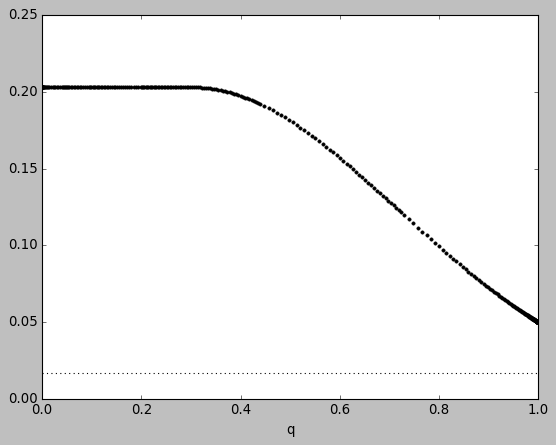

In [69]:
loadtest = np.genfromtxt("./test_core_gaussian.dat", skip_header=1)
print(np.shape(loadtest))

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(1.-loadtest[:,0], np.sum(loadtest[:,5:],axis=1), 'k.')
ax.axhline(0.017,color='k',ls=':')
ax.set_xlabel('q')

#ax.plot(loadtest[:,0], np.sum(loadtest[:,5:],axis=1), 'r.')
#ax.set_xlabel('xq')

plt.show()